In [1]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

     |████████████████████████████████| 138 kB 6.8 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=b74b6a2234d391a7e1d3a49451d11daf59e8af43bda408afc1abdfc65149bf7f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Download 100%.


In [2]:
! signate list

  competitionId  title                                                                                      closing     prize                  submitters
---------------  -----------------------------------------------------------------------------------------  ----------  -------------------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                                       -                                        5302
             24  【練習問題】お弁当の需要予測                                                               -                                        6552
             27  【練習問題】Jリーグの観客動員数予測                                                        -                                        1494
            100  【練習問題】手書き文字認識                                                                 -           Knowledge                     199
            102  【練習問題】タイタニックの生存予測                                                         -           Knowledge                    1188
 

In [3]:
! signate files --competition-id=520
! signate download --competition-id=520

  fileId  name                                           title                                                     size  updated_at
--------  ---------------------------------------------  ----------------------------------------------------  --------  -------------------
    2350  PBL05_h_exercise4_question.pdf                 PBL05_不良個所自動検出(木材)_h.演習④設問               1176226  2021-09-08 18:20:38
    2351  PBL05_i_exercise4_supplementary-documents.pdf  PBL05_不良個所自動検出(木材)_i.演習④ガイドコンテンツ   1053620  2021-09-08 18:20:40
    2381  README.md                                      配布データの説明用テキスト                                3135  2021-09-09 12:16:16
    2383  train.zip                                      1. 学習用                                             82694303  2021-09-09 15:10:26
    2384  test.zip                                       2. 評価用                                             91644093  2021-09-09 14:26:59
    2385  sample_submission.zip                          3. コンペ投稿用         

In [4]:
! unzip train.zip
! unzip train/train_annotations.zip 
! unzip train/train_images.zip

Archive:  train.zip
   creating: train/
  inflating: train/train.csv         
  inflating: train/train_annotations.zip  
 extracting: train/train_images.zip  
Archive:  train/train_annotations.zip
   creating: train_annotations/
  inflating: train_annotations/train_63_04.png  
  inflating: train_annotations/train_63_10.png  
  inflating: train_annotations/train_63_11.png  
  inflating: train_annotations/train_63_05.png  
  inflating: train_annotations/train_63_07.png  
  inflating: train_annotations/train_63_06.png  
  inflating: train_annotations/train_63_02.png  
  inflating: train_annotations/train_63_03.png  
  inflating: train_annotations/train_63_01.png  
  inflating: train_annotations/train_63_00.png  
  inflating: train_annotations/train_31_05.png  
  inflating: train_annotations/train_31_04.png  
  inflating: train_annotations/train_31_03.png  
  inflating: train_annotations/train_31_02.png  
  inflating: train_annotations/train_31_00.png  
  inflating: train_annotations/train

In [5]:
! unzip test.zip
! unzip test/test_images.zip

Archive:  test.zip
   creating: test/
  inflating: test/test.csv           
 extracting: test/test_images.zip    
Archive:  test/test_images.zip
   creating: test_images/
  inflating: test_images/test_72_00.png  
  inflating: test_images/test_27_15.png  
  inflating: test_images/test_27_01.png  
  inflating: test_images/test_44_15.png  
  inflating: test_images/test_44_01.png  
  inflating: test_images/test_11_00.png  
  inflating: test_images/test_16_09.png  
  inflating: test_images/test_62_11.png  
  inflating: test_images/test_39_01.png  
  inflating: test_images/test_62_05.png  
  inflating: test_images/test_48_01.png  
  inflating: test_images/test_60_00.png  
  inflating: test_images/test_35_01.png  
  inflating: test_images/test_56_01.png  
  inflating: test_images/test_03_00.png  
  inflating: test_images/test_03_01.png  
  inflating: test_images/test_56_00.png  
  inflating: test_images/test_35_14.png  
  inflating: test_images/test_35_00.png  
  inflating: test_images/test_6

In [6]:
! unzip sample_submission.zip

Archive:  sample_submission.zip
   creating: sample_submission/
  inflating: sample_submission/requirements.txt  
  inflating: sample_submission/sample_code.ipynb  
  inflating: sample_submission/sample_submit.csv  


In [7]:
! ls

adc.json				       test
PBL05_h_exercise4_question.pdf		       test_images
PBL05_i_exercise4_supplementary-documents.pdf  test.zip
README.md				       train
sample_data				       train_annotations
sample_submission			       train_images
sample_submission.zip			       train.zip


In [8]:
# ライブラリのインポート
import os
import glob
import random
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

# matplotlibの日本語表示を有効にする設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP'] 

'''
定数の指定
'''

# テーブルデータのパス
train_label_path = './train/train.csv' # 学習データのラベル
test_label_path = './test/test.csv' # テストデータのラベル
sub_label_path = './sample_submission/sample_submit.csv' # 提出用データ

# データの読み込み
train = pd.read_csv(train_label_path, sep=',')
test = pd.read_csv(test_label_path, sep=',')
sub = pd.read_csv(sub_label_path, sep=',')

# 画像データのファイルパスの取得
train_images_path_list = sorted(glob.glob('./train_images/*.png'))
train_annotations_path_list = sorted(glob.glob('./train_annotations/*.png'))
test_images_path_list = sorted(glob.glob('./test_images/*.png'))

print('train images: ', len(train_images_path_list))
print('train annotations: ', len(train_annotations_path_list))
print('test images: ', len(test_images_path_list))

print('--------------------------------------------------')

print(train.info())
print('全個体数:', train['object_id'].nunique())
print('異常個体数:', train.query('anomaly_flag == 1')['object_id'].nunique())
print('異常画像枚数', len(train.query('anomaly_flag == 1')))
print(train.head())

print('--------------------------------------------------')

print(test.info())
print('個体数:', test['object_id'].nunique())
print(test.head())

'''
データの可視化
'''

# 「異常あり」画像のIDを取得
train_anomaly = train[train['anomaly_flag']==1]
train_anomaly_image_id_list = sorted(train_anomaly['image_id'].unique().tolist())
train_anomaly_object_id_list = sorted(train_anomaly['object_id'].unique().tolist())

print(len(train_anomaly_image_id_list))
print(train_anomaly_image_id_list)

print(len(train_anomaly_object_id_list))
print(train_anomaly_object_id_list)

for image_id in train_anomaly_image_id_list:
    print(f'\n====={image_id}=====')
    
    # 画像のパスを指定
    image_path = os.path.join('./train_images/', f'{image_id}.png')
    annot_path = os.path.join('./train_annotations/', f'{image_id}.png')
    
    # 画像の読み込み
    image = Image.open(image_path)
    annot = Image.open(annot_path)
    
    # 画像の描画
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=80)
    ax[0].imshow(image)
    ax[1].imshow(annot, cmap='gray')
    
    plt.show()

'''
画像の統計量を算出
'''

image_values = []

for image_id in train_anomaly_image_id_list:
    image_path = os.path.join('./train_images/', f'{image_id}.png')
    image = io.imread(image_path).flatten()
    image_values.append(image)

# ヒストグラムを描画する
plt.hist(image_values, bins=10)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Canny法

train images:  490
train annotations:  18
test images:  471
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   object_id     490 non-null    object
 1   image_id      490 non-null    object
 2   anomaly_flag  490 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.6+ KB
None
全個体数: 78
異常個体数: 2
異常画像枚数 18
  object_id     image_id  anomaly_flag
0  train_00  train_00_00             0
1  train_01  train_01_00             0
2  train_01  train_01_01             0
3  train_01  train_01_02             0
4  train_01  train_01_03             0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   object_id  471 non-

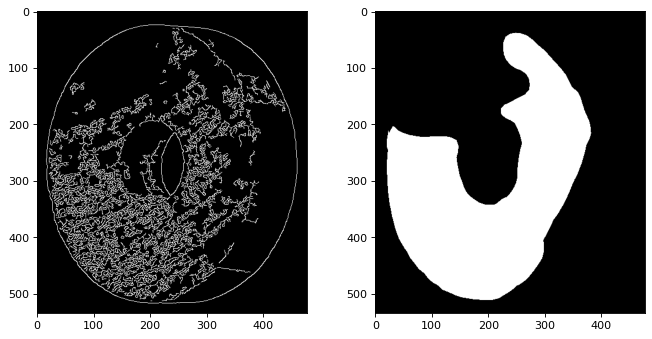


=====train_31_01=====


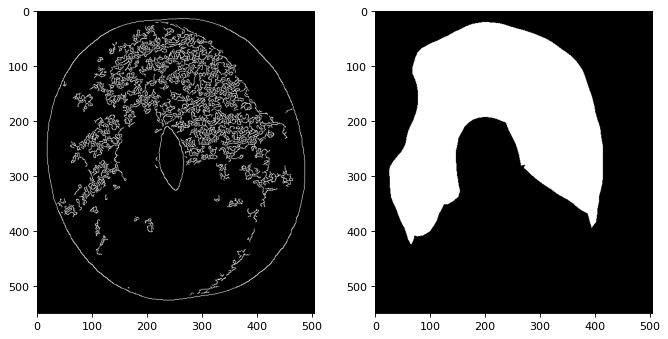


=====train_31_02=====


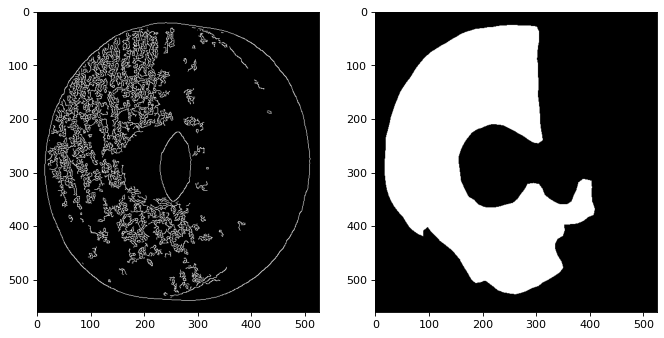


=====train_31_03=====


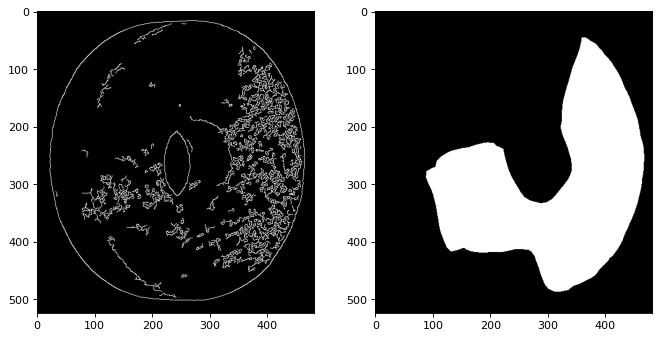


=====train_31_04=====


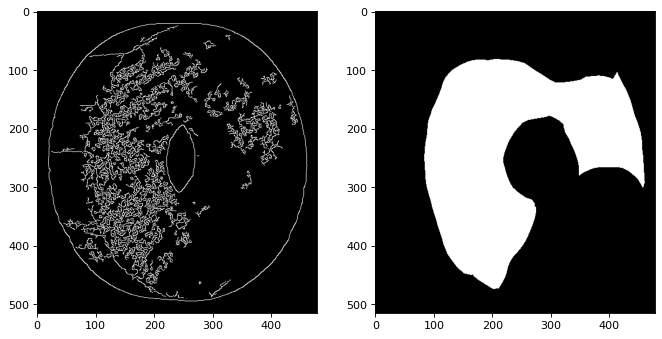


=====train_31_05=====


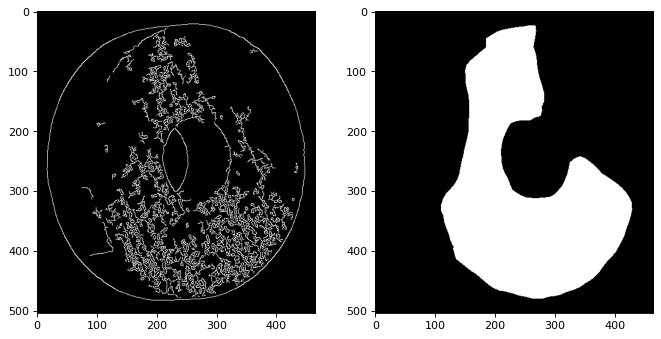


=====train_63_00=====


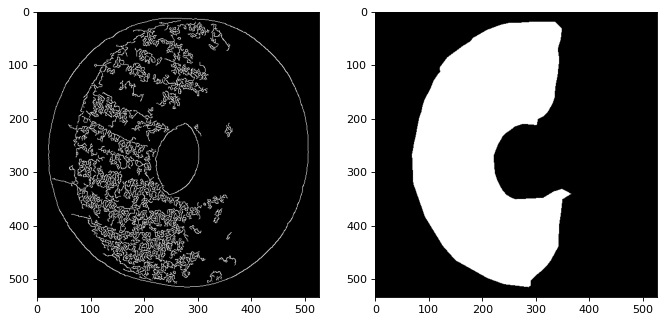


=====train_63_01=====


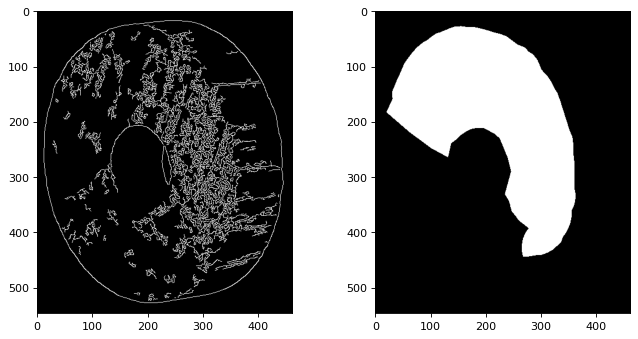


=====train_63_02=====


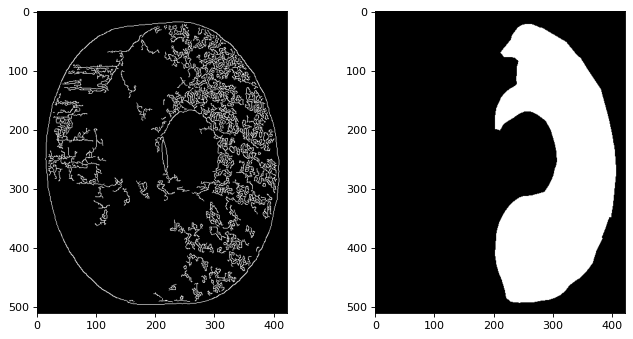


=====train_63_03=====


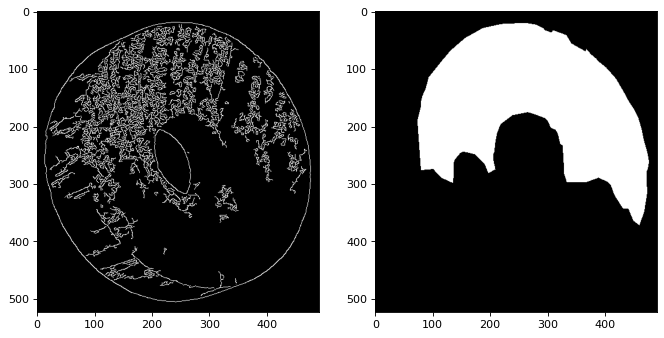


=====train_63_04=====


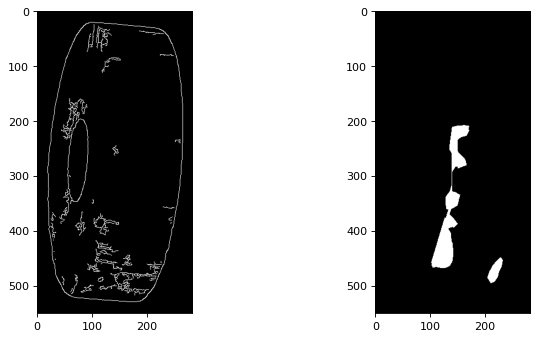


=====train_63_05=====


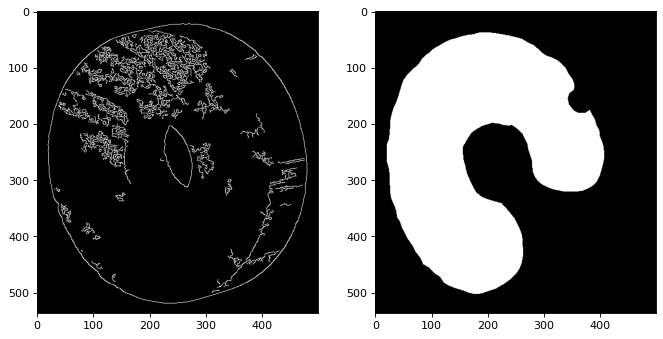


=====train_63_06=====


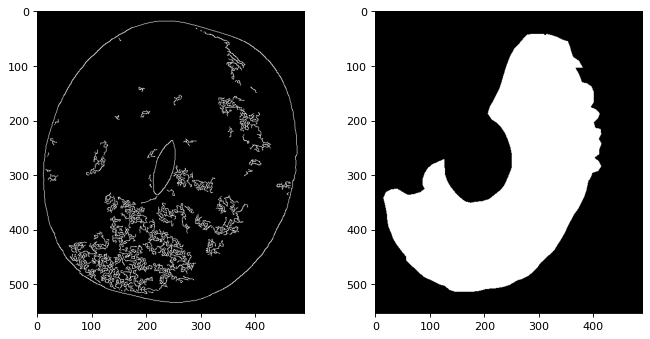


=====train_63_07=====


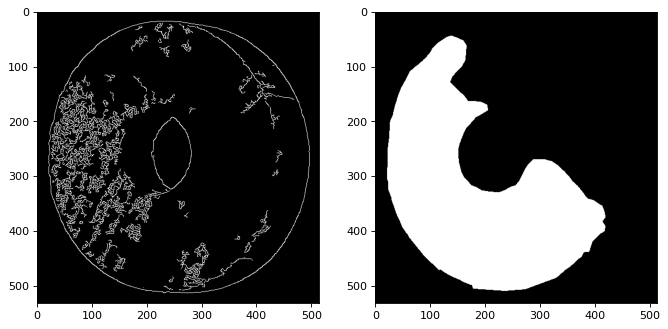


=====train_63_08=====


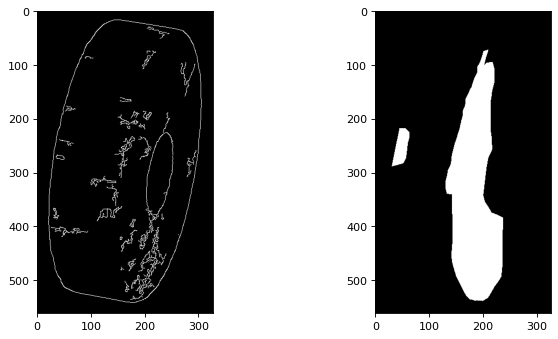


=====train_63_09=====


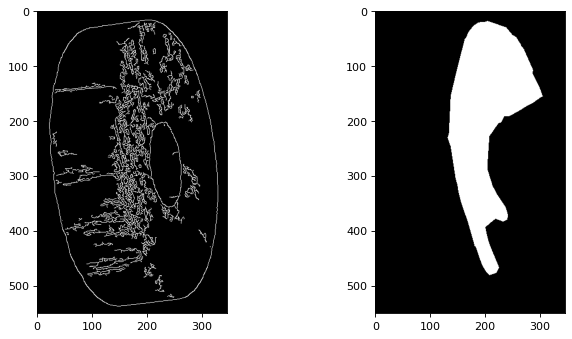


=====train_63_10=====


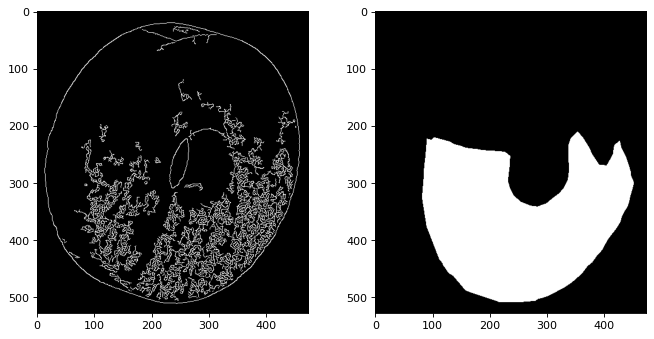


=====train_63_11=====


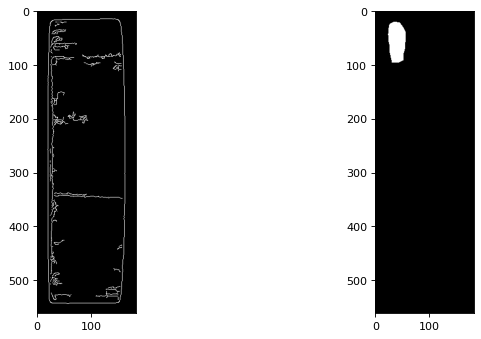

In [9]:
# ライブラリのインポート
import os
import glob
import random
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import io

# matplotlibの日本語表示を有効にする設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP'] 

'''
定数の指定
'''

# テーブルデータのパス
train_label_path = './train/train.csv' # 学習データのラベル
test_label_path = './test/test.csv' # テストデータのラベル
sub_label_path = './sample_submission/sample_submit.csv' # 提出用データ

# データの読み込み
train = pd.read_csv(train_label_path, sep=',')
test = pd.read_csv(test_label_path, sep=',')
sub = pd.read_csv(sub_label_path, sep=',')

# 画像データのファイルパスの取得
train_images_path_list = sorted(glob.glob('./train_images/*.png'))
train_annotations_path_list = sorted(glob.glob('./train_annotations/*.png'))
test_images_path_list = sorted(glob.glob('./test_images/*.png'))

print('train images: ', len(train_images_path_list))
print('train annotations: ', len(train_annotations_path_list))
print('test images: ', len(test_images_path_list))

print('--------------------------------------------------')

print(train.info())
print('全個体数:', train['object_id'].nunique())
print('異常個体数:', train.query('anomaly_flag == 1')['object_id'].nunique())
print('異常画像枚数', len(train.query('anomaly_flag == 1')))
print(train.head())

print('--------------------------------------------------')

print(test.info())
print('個体数:', test['object_id'].nunique())
print(test.head())

'''
データの可視化
'''

# 「異常あり」画像のIDを取得
train_anomaly = train[train['anomaly_flag']==1]
train_anomaly_image_id_list = sorted(train_anomaly['image_id'].unique().tolist())
train_anomaly_object_id_list = sorted(train_anomaly['object_id'].unique().tolist())

print(len(train_anomaly_image_id_list))
print(train_anomaly_image_id_list)

print(len(train_anomaly_object_id_list))
print(train_anomaly_object_id_list)

for image_id in train_anomaly_image_id_list:
    print(f'\n====={image_id}=====')
    
    # 画像のパスを指定
    image_path = os.path.join('./train_images/', f'{image_id}.png')
    annot_path = os.path.join('./train_annotations/', f'{image_id}.png')
    
    # 画像の読み込み
    image = cv2.imread(image_path)
    # グレースケール化
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Cannyエッジ検出
    img_edges = cv2.Canny(img_gray,20,80)
    
    # 大津の二値化
    ret,th = cv2.threshold(img_edges,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # アノテーションの読み込み
    annot = Image.open(annot_path)
    
    # 画像の描画
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=80)
    ax[0].imshow(th, cmap='gray')
    ax[1].imshow(annot, cmap='gray')
    
    plt.show()